<a href="https://colab.research.google.com/github/BrunoRaphaell/analisando-dados-spotify-spark/blob/main/Analisando_dados_do_Spotify_com_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O que é o Spark

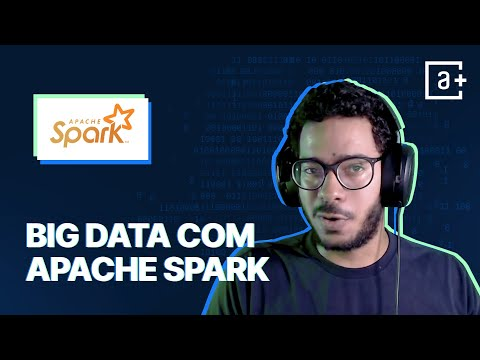

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('3aSfKsBhU5E')

# Por que utilizar o Spark?


|                                             **SPARK DATAFRAME**                                            |                                                 **PANDAS DATAFRAME**                                                 |
|:----------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------:|
|                             O Spark DataFrame oferece suporte à paralelização.                             |                                     O Pandas DataFrame não suporta paralelização.                                    |
|                                      O Spark DataFrame tem vários nós.                                     |                                          O Pandas DataFrame tem um nó único.                                         |
| Segue-se a Lazy Execution, o que significa que uma tarefa não é executada até que uma ação seja realizada. |                  Ele segue Eager Execution, o que significa que a tarefa é executada imediatamente.                  |
|                                        O Spark DataFrame é imutável.                                       |                                             O Pandas DataFrame é mutável.                                            |
|             Operações complexas são difíceis de realizar em comparação com o Pandas DataFrame.             |                 Operações complexas são mais fáceis de executar em comparação com o Spark DataFrame.                 |
|                  Spark DataFrames são excelentes para construir um aplicativo escalonável.                 |                   O Pandas DataFrames não pode ser usado para construir um aplicativo escalonável.                   |
|                               O Spark DataFrame garante tolerância a falhas.                               | O Pandas DataFrame não garante tolerância a falhas. Precisamos implementar nossa própria estrutura para garantir iss |

![](https://i1.wp.com/sparkbyexamples.com/wp-content/uploads/2020/08/What-is-PySpark.png?resize=1024%2C164&ssl=1)

Pandas executa operações em uma única máquina, enquanto o PySpark é executado em várias máquinas. Se você estiver trabalhando em um aplicativo de aprendizado de máquina em que está lidando com conjuntos de dados maiores, o PySpark é o melhor ajuste que pode processar operações muitas vezes (100x) mais rápido que o Pandas

# 1: Instalação

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 41 kB/s 
     |████████████████████████████████| 199 kB 44.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=7e46b36c65f693a9cf0e2b7be160a6f251a0dabaf8cfe5945c514b3a1fc7f699
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


Importando o `SparkSession`:

In [ ]:
from pyspark.sql import SparkSession

Agora podemos iniciar nossa sessão Spark, que nada mais é que uma API que será utilizada para trabalhar com Spark. 

In [ ]:
spark = SparkSession\
    .builder\
    .master('local[*]')\
    .appName('Analisando Dados do Spotify')\
    .getOrCreate()

In [ ]:
spark

# 2: Projeto

* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `release_date/Data de lançamento:` Data em que a música foi lançada.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `length/duração em ms:`Variável numérica, a duração da trilha em milissegundos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.


In [ ]:
from google.colab import files
arquivo = files.upload()

Saving spotify_bruno.csv to spotify_bruno.csv


In [ ]:
df = spark.read.csv('spotify_bruno.csv',
                    header=True, inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- release_date: timestamp (nullable = true)
 |-- length: integer (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)



In [ ]:
df.show(5)

+--------------------+--------------------+---------------+-------------------+------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+
|                name|               album|         artist|       release_date|length|popularity|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|  tempo|
+--------------------+--------------------+---------------+-------------------+------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+
|Me & You Together...|Me & You Together...|       The 1975|2020-01-16 00:00:00|195339|        21|     1.86E-6|       0.242| 0.768|         0.00173|    0.31|  -5.741|     0.0358|106.578|
|        Simplesmente|        Simplesmente|          Skank|2020-04-10 00:00:00|222986|        51|       0.362|        0.57| 0.514|         2.22E-5|   0.113|  -10.11|     0.0267| 86.025|
|    Hello Girlfriend|            THE GLOW|          DMA'S|2020-07-10 

## Primeira análise: Top 10 artistas mais curtidos

In [ ]:
# Quantidade de amostras

df.count()

1870

In [ ]:
from pyspark.sql.functions import asc, desc

df.groupBy('artist')\
            .count()\
            .sort(desc("count"))\
            .show(10, truncate=False)


+--------------------------+-----+
|artist                    |count|
+--------------------------+-----+
|Oasis                     |157  |
|The Beatles               |83   |
|Dream Theater             |62   |
|Ed Sheeran                |50   |
|O Teatro Mágico           |42   |
|Pink Floyd                |41   |
|Raimundos                 |29   |
|Selvagens à Procura de Lei|27   |
|Queen                     |25   |
|Validuaté                 |24   |
+--------------------------+-----+
only showing top 10 rows



## Segunda análise: Quantidade de músicas por ano de lançamento

In [ ]:
from pyspark.sql.functions import year

df1 = df.withColumn("year", year(df.release_date)).drop('release_date')
df1.show()

+--------------------+--------------------+--------------------+------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+----+
|                name|               album|              artist|length|popularity|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|  tempo|year|
+--------------------+--------------------+--------------------+------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+----+
|Me & You Together...|Me & You Together...|            The 1975|195339|        21|     1.86E-6|       0.242| 0.768|         0.00173|    0.31|  -5.741|     0.0358|106.578|2020|
|        Simplesmente|        Simplesmente|               Skank|222986|        51|       0.362|        0.57| 0.514|         2.22E-5|   0.113|  -10.11|     0.0267| 86.025|2020|
|    Hello Girlfriend|            THE GLOW|               DMA'S|232666|        34|     6.23E-4|       0.455| 0.909|     

In [ ]:
df1.groupBy('year')\
            .count()\
            .sort(desc("count"))\
            .show(15)

+----+-----+
|year|count|
+----+-----+
|2017|  253|
|2016|  219|
|2018|  132|
|2014|  129|
|2015|  125|
|2019|   83|
|2013|   77|
|2011|   64|
|1995|   48|
|2012|   47|
|2009|   46|
|1997|   45|
|1994|   44|
|2005|   37|
|2003|   36|
+----+-----+
only showing top 15 rows



## Terceira análise: Analisar as maiores músicas

[documentação](https://sparkbyexamples.com/pyspark/pyspark-withcolumn/)

In [ ]:
from pyspark.sql.functions import col

df1 = df1.withColumn("length",col("length")/60000)

In [ ]:
df1.show()

+--------------------+--------------------+--------------------+------------------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+----+
|                name|               album|              artist|            length|popularity|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|  tempo|year|
+--------------------+--------------------+--------------------+------------------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+----+
|Me & You Together...|Me & You Together...|            The 1975|           3.25565|        21|     1.86E-6|       0.242| 0.768|         0.00173|    0.31|  -5.741|     0.0358|106.578|2020|
|        Simplesmente|        Simplesmente|               Skank|3.7164333333333333|        51|       0.362|        0.57| 0.514|         2.22E-5|   0.113|  -10.11|     0.0267| 86.025|2020|
|    Hello Girlfriend|            THE GLOW|               DM

In [ ]:
df1.agg({'length': 'min'}).show()

+-----------+
|min(length)|
+-----------+
|     0.2595|
+-----------+



In [ ]:
df1.agg({'length': 'max'}).show()

+------------------+
|       max(length)|
+------------------+
|24.000216666666667|
+------------------+



Vamos verificar quais são essas músicas?


In [ ]:
# Maior música curtida:

df1.filter(df1.length == 24.000216666666667).show()

+----------+----------+-------------+------------------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+----+
|      name|     album|       artist|            length|popularity|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|  tempo|year|
+----------+----------+-------------+------------------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+----+
|Octavarium|Octavarium|Dream Theater|24.000216666666667|        41|      0.0109|       0.309| 0.745|         0.00159|   0.103|   -6.73|     0.0462|127.928|2005|
+----------+----------+-------------+------------------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+----+



In [ ]:
# Menor música curtida:

df1.filter(df1.length == 0.2595).show()

+-----+-----+------------+------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+----+
| name|album|      artist|length|popularity|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|  tempo|year|
+-----+-----+------------+------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+----+
|Poema| Vida|Melqui Brito|0.2595|         0|       0.808|        0.66| 0.244|             0.0|   0.526| -15.335|      0.548|131.683|2015|
+-----+-----+------------+------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+----+



In [ ]:
df.filter(df.artist == "Melqui Brito").show(truncate=False)

+------------------------------+--------------+------------+-------------------+------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+
|name                          |album         |artist      |release_date       |length|popularity|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|tempo  |
+------------------------------+--------------+------------+-------------------+------+----------+------------+------------+------+----------------+--------+--------+-----------+-------+
|Eterno                        |Vida          |Melqui Brito|2015-11-27 00:00:00|196050|0         |0.903       |0.455       |0.403 |0.00429         |0.115   |-9.344  |0.0314     |147.768|
|A Dor                         |Por Outro Lado|Melqui Brito|2018-08-27 00:00:00|140541|0         |0.911       |0.517       |0.174 |2.01E-4         |0.105   |-14.673 |0.0512     |141.752|
|Meu Jardim                    |Poeta         |Melqui Brito|2017-